# Notebook Imports

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

# Gather Data

In [3]:
boston_dataset= load_boston()

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

=================================================================================== <br>
when gathering the data we must know something about the data itself: <br>
==================================================================================== <br>
1. source of data : which in this dataset it is from a research paper from 1978 <br>
2. description of dataset : which is house price according to different fetures <br>
3. number of datapoints = 506 <br>
4. number of features = 13 <br>
5. names of features : given <br>
6. description of features : given

In [7]:
boston_dataset.filename

'D:\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv'

In [8]:
boston_dataset.target # actual price of house in thousands(000)

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### data points and features
(if raw data is given without description)

In [9]:
type(boston_dataset.data)

numpy.ndarray

In [10]:
print(boston_dataset.data.shape)

(506, 13)


so, 506 is no. of row(number of data points)  & 13 is no. of columns(number of features)

## Data exploration using Pandas dataframe

In [11]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [12]:
data['PRICE'] = boston_dataset.target

In [13]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [14]:
data.tail()

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [15]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for the missing value

In [16]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [18]:
#(data == 0).sum(axis=0) # to check for zero values

# Data visualization - Histograms, Distribution and Bar Charts

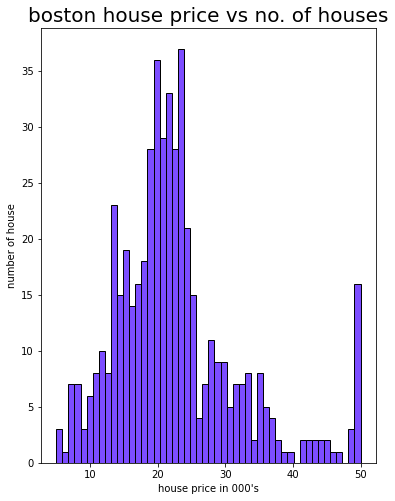

In [19]:
plt.figure(figsize = (6,8))
plt.hist(data['PRICE'], bins = 50, ec = "black", color = '#7C4DFF')
plt.xlabel('house price in 000\'s')
plt.ylabel('number of house')
plt.title('boston house price vs no. of houses', fontsize = 20)
plt.show()

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


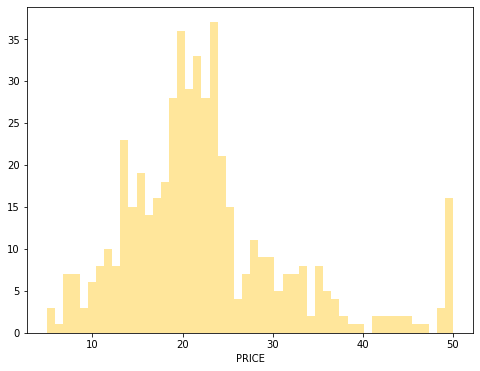

In [20]:
plt.figure(figsize = (8,6))
sns.distplot(data['PRICE'], kde = False, hist = True, color = '#FFC107' , bins=50)
plt.show()

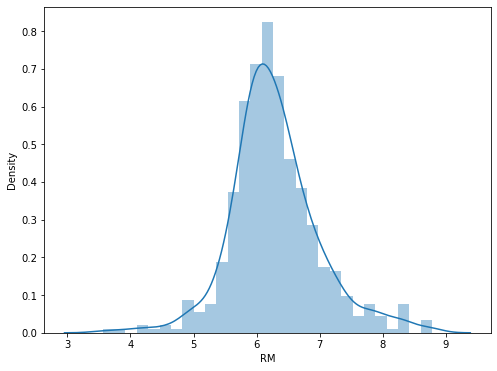

In [21]:
plt.figure(figsize = (8,6))
sns.distplot(data['RM'])
plt.show()

In [22]:
data['RM'].mean()

6.284634387351787

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


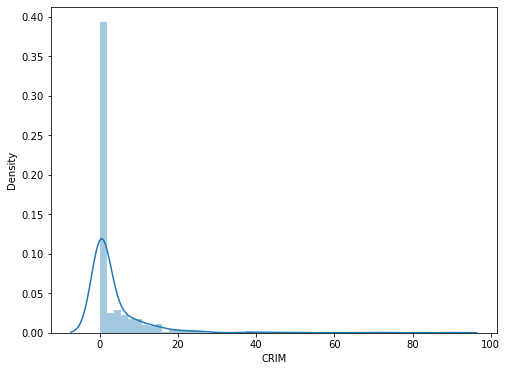

In [23]:
plt.figure(figsize=(8,6))
sns.distplot(data['CRIM'], bins=50)
plt.show()

In [24]:
pd.DataFrame.mean(data['CRIM'])

3.6135235573122535

<function matplotlib.pyplot.show(close=None, block=None)>

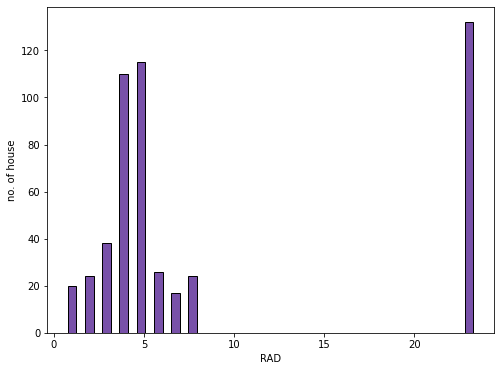

In [25]:
plt.figure(figsize=(8,6))
plt.hist(data['RAD'], bins = 24, ec='black', color = '#7851a9', align='left', rwidth=0.5)
plt.xlabel('RAD')
plt.ylabel('no. of house')
plt.show

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RAD', ylabel='Density'>

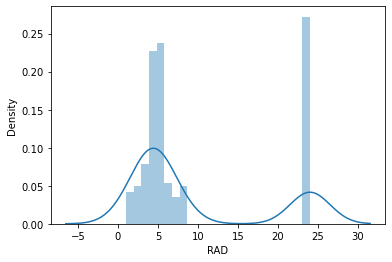

In [26]:
sns.distplot(data.RAD, bins = 24)

In [27]:
frequency = data['RAD'].value_counts()
frequency

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [28]:
frequency.index
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

<function matplotlib.pyplot.show(close=None, block=None)>

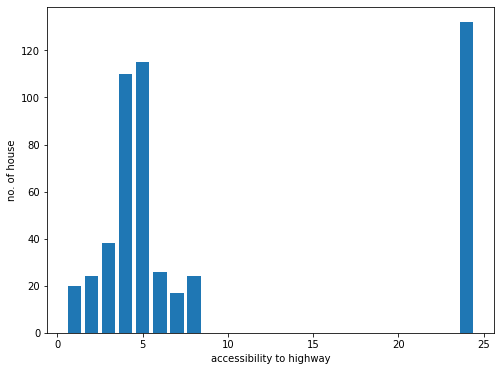

In [29]:
plt.figure(figsize=(8,6))
plt.bar(frequency.index, frequency)
plt.xlabel('accessibility to highway')
plt.ylabel('no. of house')
plt.show

In [30]:
chas = data['CHAS'].value_counts()
chas

0.0    471
1.0     35
Name: CHAS, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHAS', ylabel='count'>

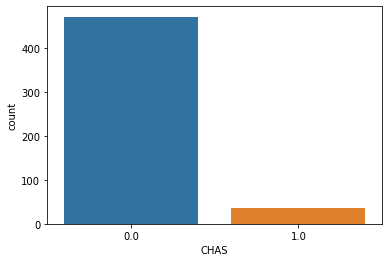

In [31]:
sns.countplot('CHAS', data = data)

# descriptive statistics

In [32]:
data['PRICE'].min()

5.0

In [33]:
data['PRICE'].max()

50.0

In [34]:
data['PRICE'].mean()

22.532806324110698

In [35]:
data['PRICE'].median()

21.2

In [36]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## correlation
## $$ \rho _{XY} = Corr(X,Y) $$
## $$ -1.00 \leq \rho _{XY} \leq +1.00 $$

In [37]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [38]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [39]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [40]:
mask = np.zeros_like(data.corr())
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
traingular_indices = np.triu_indices_from(mask)
mask[traingular_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

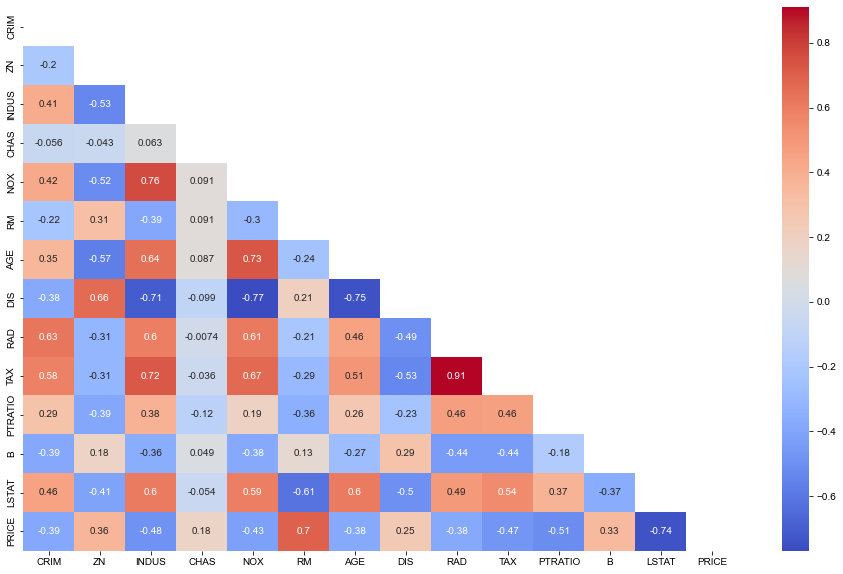

In [42]:
plt.figure(figsize=(16,10))
sns.heatmap(data = data.corr(), mask = mask, annot= True, annot_kws= {'size' : 10},  cmap = cm.coolwarm)
sns.set_style('white')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.show()

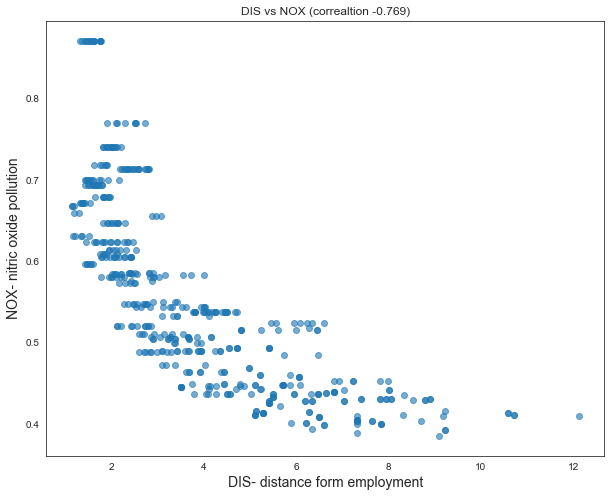

In [43]:
nox_dis_corr = round(data.DIS.corr(data.NOX),3)
plt.figure(figsize=(10,8))
plt.scatter(data.DIS, data.NOX, alpha=0.6)
plt.title(f'DIS vs NOX (correaltion {nox_dis_corr})')
plt.xlabel('DIS- distance form employment', fontsize=14)
plt.ylabel('NOX- nitric oxide pollution', fontsize=14)
plt.show()

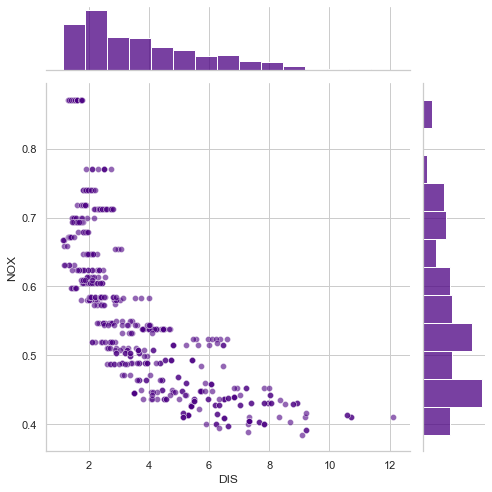

In [44]:
sns.set()
sns.set_style('whitegrid')
sns.jointplot(x = data.DIS, y = data.NOX, color = 'indigo', height = 7, joint_kws = {'alpha' : 0.6})
plt.show()

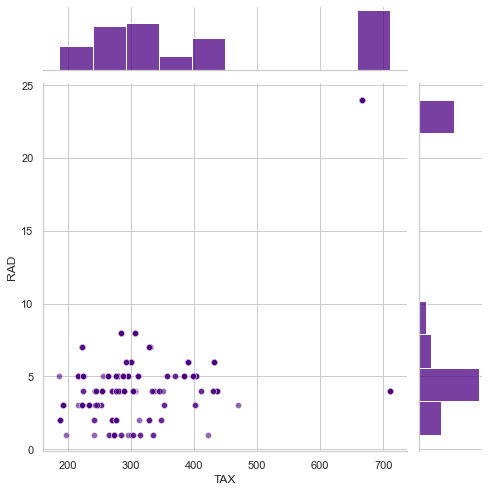

In [45]:
regr = LinearRegression()
sns.set()
sns.set_style('whitegrid')
sns.jointplot(x = data.TAX, y = data.RAD, color = 'indigo', height = 7, joint_kws = {'alpha' : 0.6})
plt.show()

D:\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


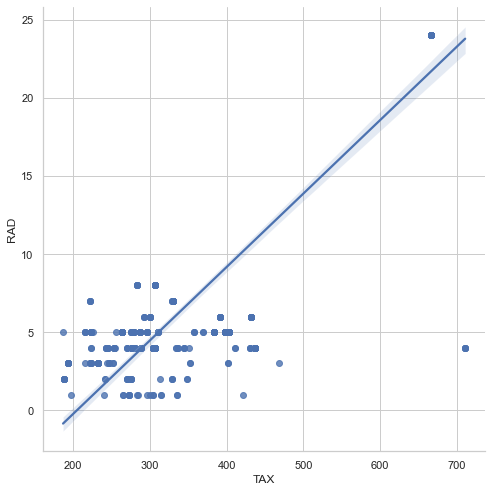

In [46]:

# sns.regplot(x = 'TAX', y = 'RAD', data = data)
sns.lmplot(x = 'TAX', y = 'RAD', data = data, size = 7)
plt.show()

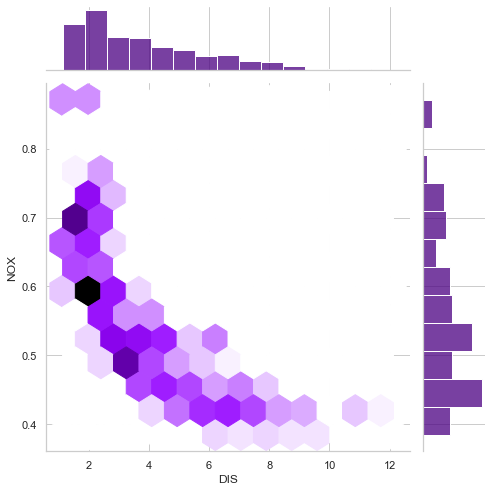

In [47]:
sns.set()
sns.set_style('whitegrid')
sns.jointplot(x = data.DIS, y = data.NOX, color = 'indigo', height = 7, kind='hex')
plt.show()

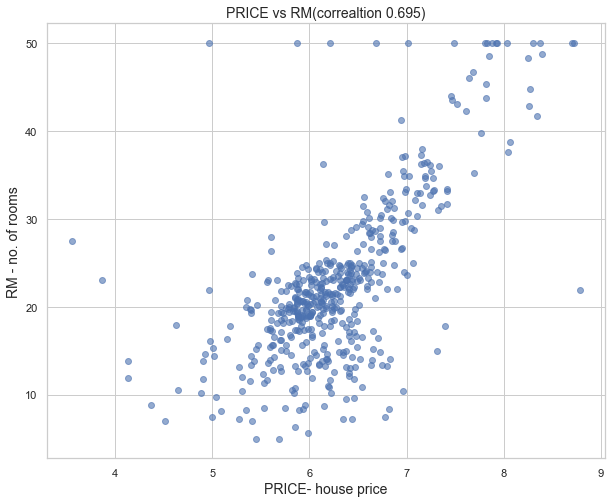

In [48]:
rm_price_corr = round(data.RM.corr(data.PRICE),3)
plt.figure(figsize=(10,8))
plt.scatter(data.RM, data.PRICE, alpha=0.6)
plt.title(f'PRICE vs RM(correaltion {rm_price_corr})', fontsize=14)
plt.xlabel('PRICE- house price', fontsize=14)
plt.ylabel('RM - no. of rooms', fontsize=14)
plt.show()

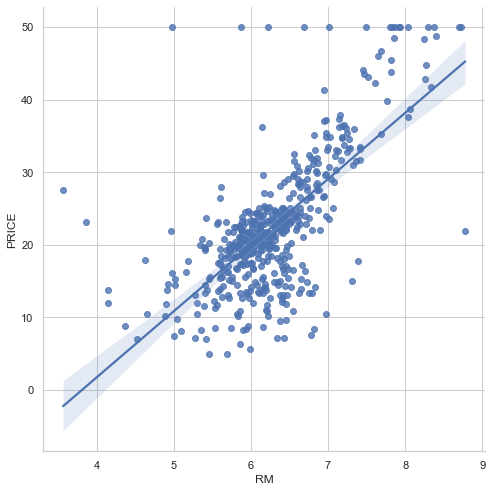

In [49]:
sns.lmplot(x='RM', y='PRICE', data=data, height = 7)
plt.show()

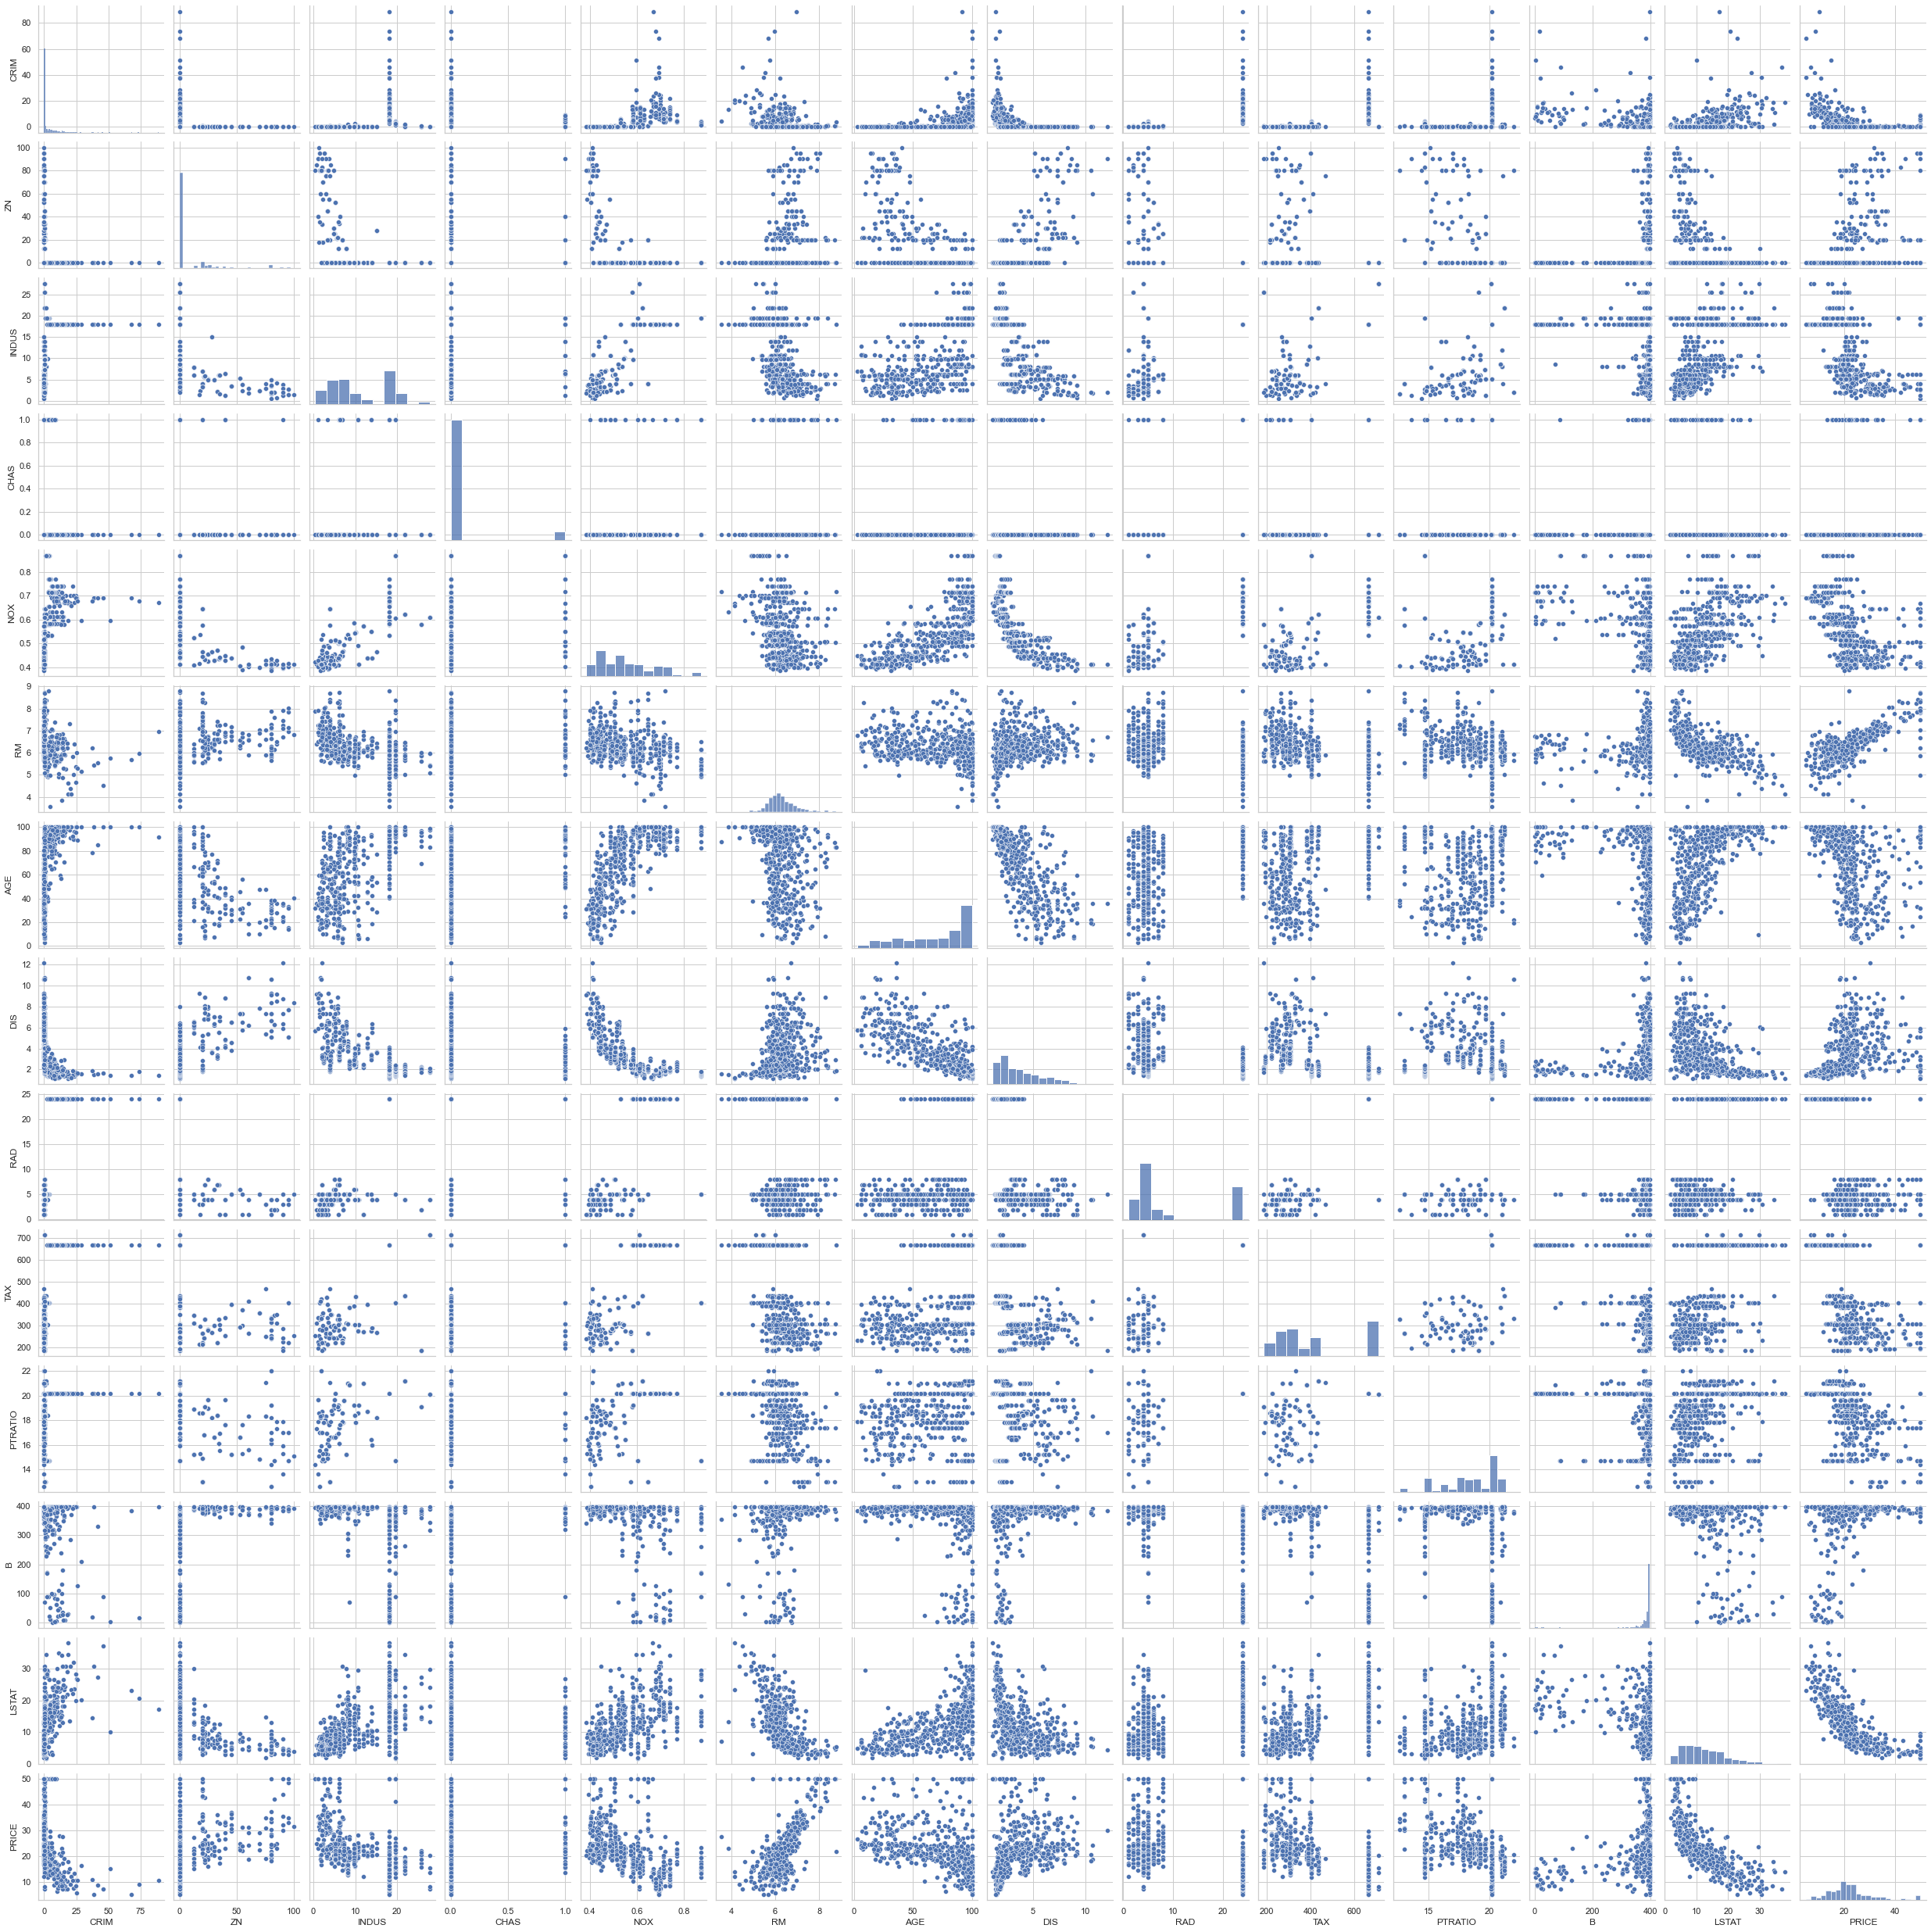

Wall time: 23.4 s


In [50]:
%%time

sns.pairplot(data)
plt.show()

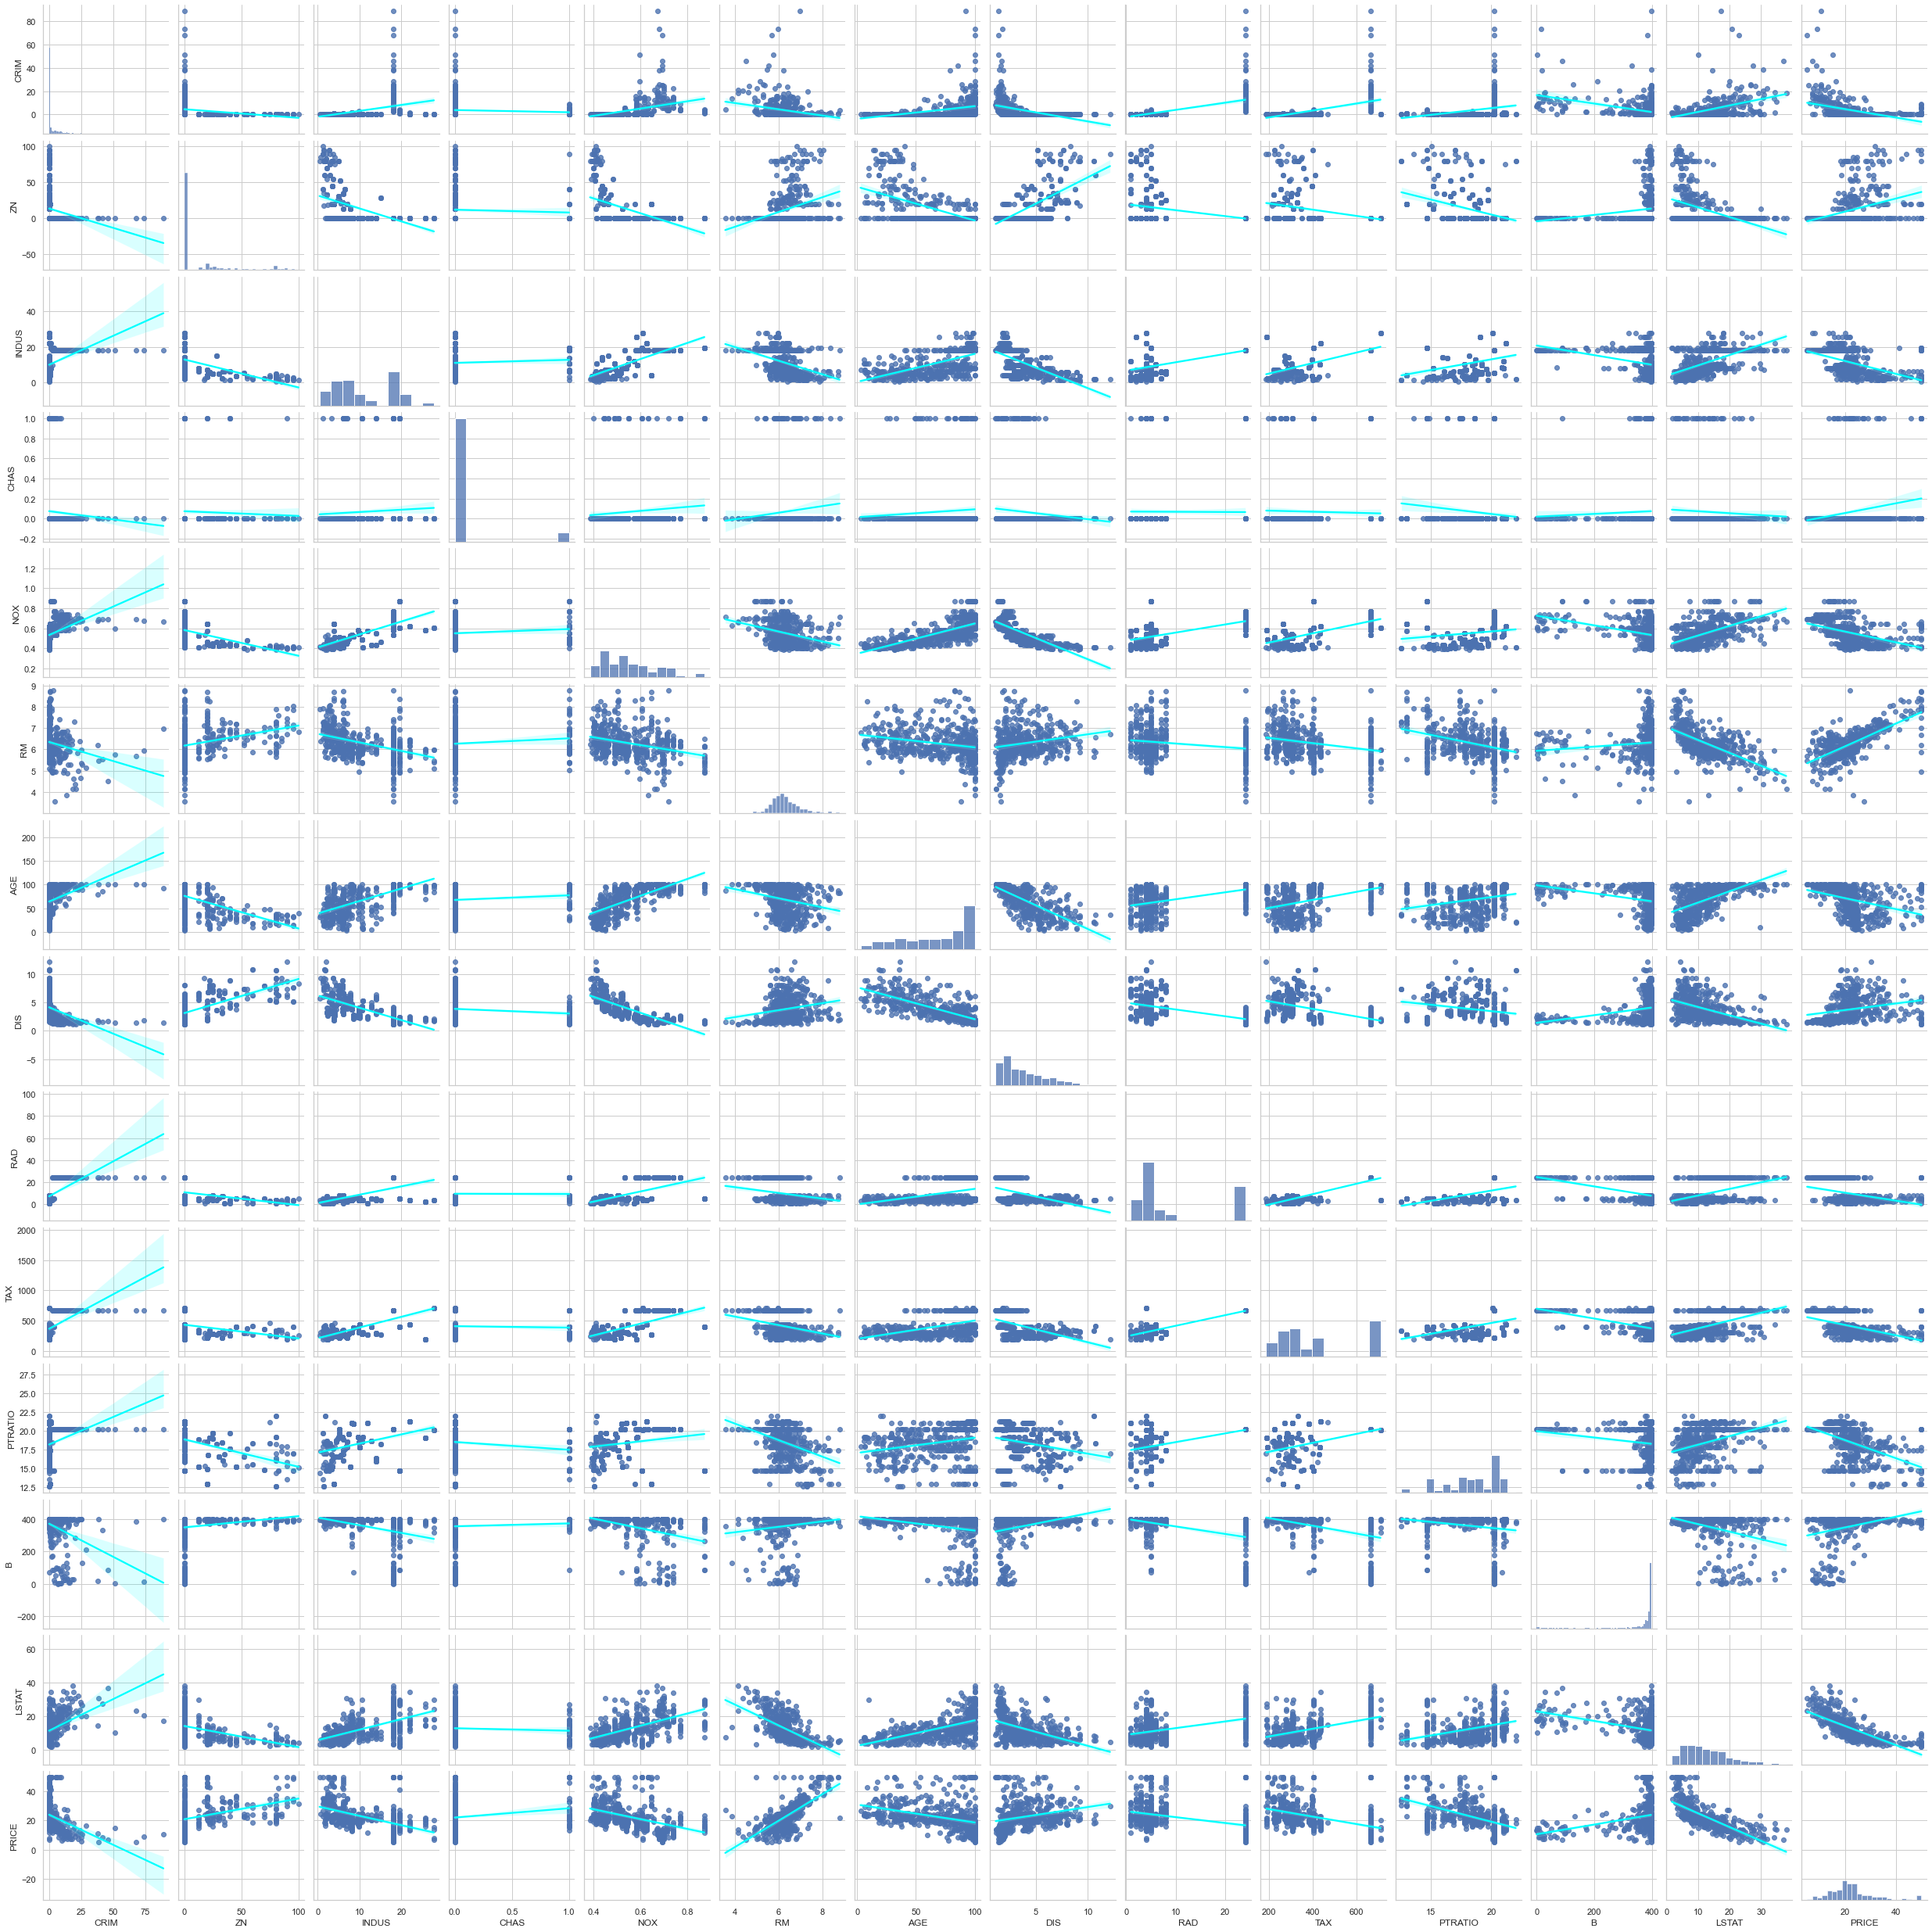

Wall time: 42.3 s


In [51]:
%%time
sns.pairplot(data, kind='reg', plot_kws = {'line_kws' : {'color': 'cyan'}})
plt.show()

## Train & Split data with shuffle

In [52]:
features = data.drop('PRICE', axis=1 ) #axis= 1 is column
target = data.PRICE

In [53]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,
                                                    random_state=10)

In [54]:
len(X_test)/len(features)

0.2015810276679842

In [55]:
y_train.shape[0] / target.shape[0]

0.7984189723320159

## multivariable regression

In [56]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [57]:
print('intercept:',regr.intercept_)
print('training data r-squared:',regr.score(X_train, y_train))
print('testing data r-squared:',regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns= ['PRICE_coef'])

intercept: 36.53305138282439
training data r-squared: 0.750121534530608
testing data r-squared: 0.6709339839115628


PRICE_coef
CRIM      -0.128181
ZN         0.063198
INDUS     -0.007576
CHAS       1.974515
NOX      -16.271989
RM         3.108456
AGE        0.016292
DIS       -1.483014
RAD        0.303988
TAX       -0.012082
PTRATIO   -0.820306
B          0.011419
LSTAT     -0.581626

## data transformation

In [58]:
data.PRICE.skew()

1.1080984082549072

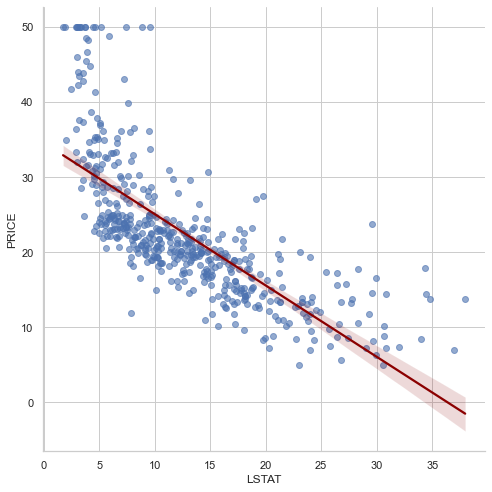

In [59]:
sns.lmplot(x = 'LSTAT', y='PRICE', data=data, line_kws = {'color': 'darkred'}, height = 7, scatter_kws = {'alpha' : 0.6})
plt.show()

In [60]:
y_log = np.log(data.PRICE)
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

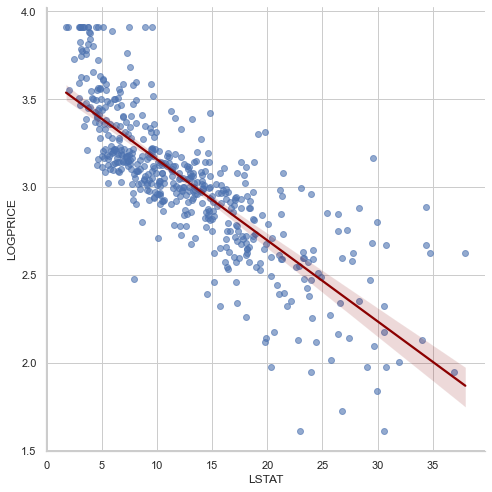

In [61]:
transformed_data = features
transformed_data['LOGPRICE'] = y_log

sns.lmplot(x = 'LSTAT', y='LOGPRICE', data=transformed_data, line_kws = {'color': 'darkred'}, height = 7, scatter_kws = {'alpha' : 0.6})
plt.show()


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

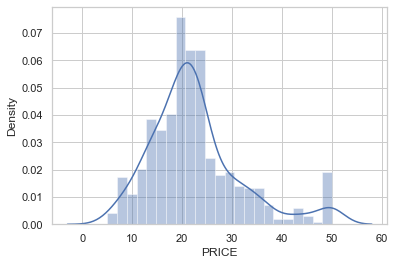

In [62]:
sns.distplot(data.PRICE) 

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


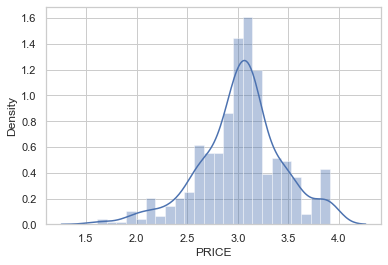

In [63]:
sns.distplot(y_log)
plt.show()

In [64]:
# patition of data for spliting into test and train data set
features = data.drop('PRICE', axis = 1)
target = y_log

# splitiong into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    train_size=0.8, random_state=10 )
# algorithm
regr.fit(X_train,y_train)

print('intercept:',regr.intercept_)
print('training data r-squared:',regr.score(X_train, y_train))
print('testing data r-squared:',regr.score(X_test, y_test))
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns= ['PRICE_coef'])

intercept: 4.05994387177519
training data r-squared: 0.7930234826697583
testing data r-squared: 0.7446922306260724


PRICE_coef
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390

In [65]:
# premium for house near river i.e. 1000 * ans
np.e**0.080331 
np.e**target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

## p-values & evaluating coefficient (statistical significance)

standard metric of p value is 0.05 i.e. 5% 

In [66]:
X_incl_const = sm.add_constant(data = X_train)
mod = sm.OLS(y_train, X_incl_const)
result = mod.fit()
pd.DataFrame({'log_coeff' : result.params,'p_values' : round(result.pvalues, 3)}) 

D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


log_coeff  p_values
const     4.059944     0.000
CRIM     -0.010672     0.000
ZN        0.001579     0.009
INDUS     0.002030     0.445
CHAS      0.080331     0.038
NOX      -0.704068     0.000
RM        0.073404     0.000
AGE       0.000763     0.209
DIS      -0.047633     0.000
RAD       0.014565     0.000
TAX      -0.000645     0.000
PTRATIO  -0.034795     0.000
B         0.000516     0.000
LSTAT    -0.031390     0.000

#### so,in the above dataframe, AGE & INDUS, have no statistical significance

In [67]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     114.9
Date:                Mon, 02 May 2022   Prob (F-statistic):          1.70e-124
Time:                        18:54:46   Log-Likelihood:                 111.88
No. Observations:                 404   AIC:                            -195.8
Df Residuals:                     390   BIC:                            -139.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0599      0.227     17.880      0.000       3.614       4.506
CRIM          -0.0107      0.001     -7.971      0.000      -0.013      -0.008
ZN             0.0016      0.001      2.641      0.009       0.000       0.003
INDUS          0.0020      0.003      0.765      0.445      -0.003       0.007
CHAS           0.0803      0.039      2.079      0.038       0.004       0.156
NOX           -0.7041      0.166     -4.245      0.000      -1.030      -0.378
RM             0.0734      0.019      3.910      0.000       0.036       0.110
AGE            0.0008      0.001      1.258      0.209      -0.000       0.002
DIS           -0.0476      0.009     -5.313      0.000      -0.065      -0.030
RAD            0.0146      0.003      5.170      0.000       0.009       0.020
TAX           -0.0006      0.000     -4.095      0.000      -0.001      -0.000
PTRATIO       -0.0348      0.006     -5.908      0.000      -0.046      -0.023
B              0.0005      0.000      4.578      0.000       0.000       0.001
LSTAT         -0.0314      0.002    -14.213      0.000      -0.036      -0.027
==============================================================================
Omnibus:                       28.711   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.952
Skew:                           0.093   Prob(JB):                     9.84e-24
Kurtosis:                       5.502   Cond. No.                     1.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Testing for Multicolinearity (using VIF)
### first part: regression of independent variable:
## $$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 CRIM +....+ \alpha _{12} LSTAT   $$
### second part: calculating Variation Inflation Factor: 
## $$ VIF _{TAX} = \frac {1}{1-R _{TAX}^ 2} $$

In [68]:
variance_inflation_factor(exog = X_incl_const.values, exog_idx = 10)

8.508856493040817

In [69]:
# X_incl_const.shape
len(X_incl_const.columns)

14

In [70]:
vif = []
for i in range(len(X_incl_const.columns)):
    result = variance_inflation_factor(exog=X_incl_const.values, exog_idx=i)
    vif.append(result)

print(vif)
pd.DataFrame({'vif' : np.around(vif, 2), 'threshold' : 10}, index = X_incl_const.columns)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


vif  threshold
const    597.55         10
CRIM       1.71         10
ZN         2.33         10
INDUS      3.94         10
CHAS       1.08         10
NOX        4.41         10
RM         1.84         10
AGE        3.33         10
DIS        4.22         10
RAD        7.31         10
TAX        8.51         10
PTRATIO    1.84         10
B          1.34         10
LSTAT      2.81         10

## Model simplification & Bayesian Criterion Factor(BIC)

-> regression 

In [70]:
# original model with log prices and all features

X_incl_const = sm.add_constant(data=X_train)

mod = sm.OLS(endog=y_train, exog=X_incl_const)
result = mod.fit()

org_coef = pd.DataFrame({'coeff' : result.params, 'P-value' : round(result.pvalues, 3)})

print('r_squared of original model',result.rsquared)
print('BIC of orginal model',result.bic)

r_squared of original model 0.7930234826697582
BIC of orginal model -139.74997769478875


D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
# reduced model #1 INDUS excluded

X_incl_const = sm.add_constant(data = X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

mod = sm.OLS(endog=y_train, exog=X_incl_const)
result = mod.fit()

coef_minus_indus= pd.DataFrame({'coeff' : result.params, 'P-value' : round(result.pvalues, 3)})

print('r_squared of reduced model(INDUS)',result.rsquared)
print('BIC of reduced model(Indus)',result.bic)

r_squared of reduced model(INDUS) 0.7927126289415163
BIC of reduced model(Indus) -145.14508855591163


D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


 Observation: we can see that -145 < -139. so, excluding INDUS reduces complexity of model and the rsquared is also same 0.79 in both model which is good  





In [72]:
# reduced model #2 AGE excluded

X_incl_const = sm.add_constant(data = X_train)
X_incl_const = X_incl_const.drop(['INDUS', 'AGE'], axis=1)

mod = sm.OLS(endog=y_train, exog=X_incl_const)
result = mod.fit()

reduced_coef = pd.DataFrame({'coeff' : result.params, 'P-value' : round(result.pvalues, 3)})

print('r_squared of reduced model',result.rsquared)
print('BIC of reduced model',result.bic)

r_squared of reduced model 0.7918657661852815
BIC of reduced model -149.49934294224678


D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


observation: we can see that -149 < -139. so, excluding age & indus reduces complexity of model and the rsqaured is also same 0.79 in both model which is good

In [73]:
frame = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frame, axis=1)

coeff  P-value     coeff  P-value     coeff  P-value
const    4.059944    0.000  4.056231    0.000  4.035922    0.000
CRIM    -0.010672    0.000 -0.010721    0.000 -0.010702    0.000
ZN       0.001579    0.009  0.001551    0.010  0.001461    0.014
INDUS    0.002030    0.445       NaN      NaN       NaN      NaN
CHAS     0.080331    0.038  0.082795    0.032  0.086449    0.025
NOX     -0.704068    0.000 -0.673365    0.000 -0.616448    0.000
RM       0.073404    0.000  0.071739    0.000  0.076133    0.000
AGE      0.000763    0.209  0.000766    0.207       NaN      NaN
DIS     -0.047633    0.000 -0.049394    0.000 -0.052692    0.000
RAD      0.014565    0.000  0.014014    0.000  0.013743    0.000
TAX     -0.000645    0.000 -0.000596    0.000 -0.000590    0.000
PTRATIO -0.034795    0.000 -0.034126    0.000 -0.033481    0.000
B        0.000516    0.000  0.000511    0.000  0.000518    0.000
LSTAT   -0.031390    0.000 -0.031262    0.000 -0.030271    0.000

## analyzing data with residual & residuals plot

D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


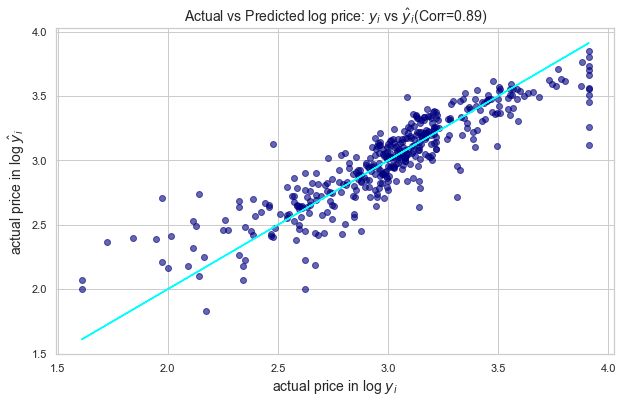

In [74]:
# modified model: Transforemd(log transformation -> price) & simplified(dropping two features)
features = data.drop(['INDUS', 'AGE', 'PRICE'], axis=1) 
target = np.log(data.PRICE) # for log price

X_train, X_test ,y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

#regression using statsmodel
X_incl_const = sm.add_constant(X_train)
mod = sm.OLS(endog = y_train, exog= X_incl_const)
result = mod.fit()

# residuals
# residuals = y_train - result.fittedvalues
# result.resid

# plotting actual value vs predicted value
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=y_train, y=result.fittedvalues, c='navy', alpha=0.6)
plt.plot( y_train, y_train, color = 'cyan') 
plt.xlabel('actual price in log $ y _i$', fontsize=14)
plt.ylabel('actual price in log $\haty _i$', fontsize=14)
plt.title(f'Actual vs Predicted log price: $ y _i$ vs $\haty_i$(Corr={corr})', fontsize=14)
plt.show()


# MSE & Rsquared
modified_log_mse = result.mse_resid
modified_log_rsquared = result.rsquared

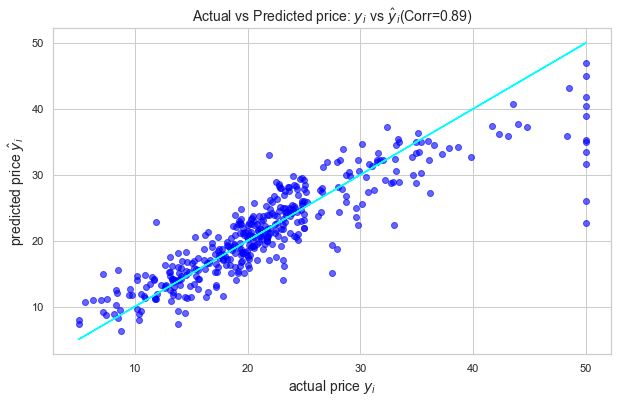

In [75]:

# plotting actual value vs predicted value
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=(10,6))
plt.scatter(x=np.e**y_train, y=np.e**result.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color = 'cyan') 
plt.xlabel('actual price $ y _i$', fontsize=14)
plt.ylabel('predicted price $\haty _i$', fontsize=14)
plt.title(f'Actual vs Predicted price: $ y _i$ vs $\haty_i$(Corr={corr})', fontsize=14)
plt.show()


observation: with the real price we can see that there is no large residual except in 50,000 line

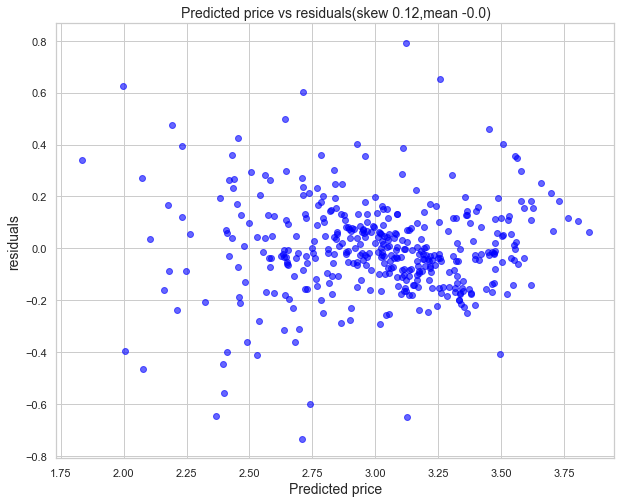

In [76]:

# plotting predicted log value vs residuals-> to check for normal distribution
# corr = round(result.fittedvalues.corr(result.resid), 1000)
resid_mean = round(result.resid.mean(),2)
resid_skew = round(result.resid.skew(), 2)
plt.figure(figsize=(10,8))
plt.scatter(x=result.fittedvalues, y=result.resid, c='blue', alpha=0.6) 
plt.xlabel('Predicted price', fontsize=14)
plt.ylabel('residuals', fontsize=14)
plt.title(f'Predicted price vs residuals(skew {resid_skew},mean {resid_mean})', fontsize=14)
plt.show()


observation: the points looks randomly distributed <br> many point are centered to 0 in y-axis <br> distribution is like cloud except some outliers pattern


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


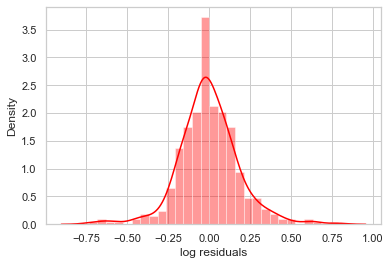

In [77]:
sns.distplot(result.resid, color = 'red').set_xlabel('log residuals')
plt.show()

observation: it is close to normally distributed but has long tail then a normally distributed data

D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


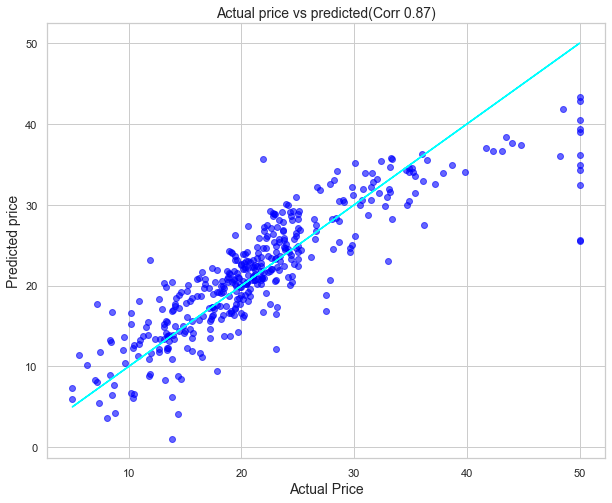

In [78]:
# Model with normal price in 000's
features = data.drop('PRICE', axis = 1)
targets = data.PRICE

# splitiong into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, 
                                                    train_size=0.8, random_state=10 )


# algorithm
X_incl_constant = sm.add_constant(X_train)
mod = sm.OLS(endog = y_train, exog = X_incl_constant)
results = mod.fit()

# plotting actual vs predicted price
plt.figure(figsize=(10,8))
plt.scatter(x=y_train, y=results.fittedvalues, c='blue', alpha=0.6)
plt.plot(y_train, y_train, color = 'cyan')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted price', fontsize=14)
plt.title(f'Actual price vs predicted(Corr {round(y_train.corr(results.fittedvalues),2)})', fontsize=14)
plt.show()


# MSE & Rsquared
normal_price_mse = results.mse_resid
normal_price_rsquared = results.rsquared

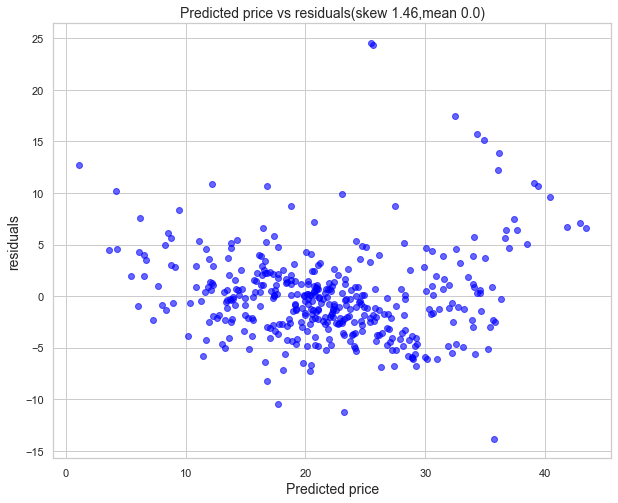

In [79]:
#plotting predicted values vs residuals
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(), 2)
plt.figure(figsize=(10,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='blue', alpha=0.6) 
plt.xlabel('Predicted price', fontsize=14)
plt.ylabel('residuals', fontsize=14)
plt.title(f'Predicted price vs residuals(skew {resid_skew},mean {resid_mean})', fontsize=14)
plt.show()

observation: points are closer to zero but are not centered <br> it is not forming cloud shape distribution <br>
it have a look of parabolic shape and is not entirely random

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


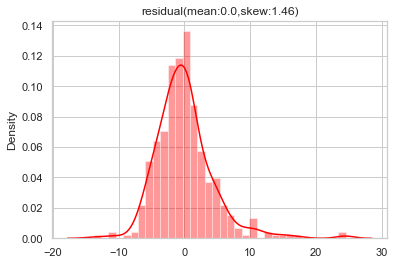

In [80]:
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(), 2)
sns.distplot(results.resid, color="red").set_title(f'residual(mean:{resid_mean},skew:{resid_skew})')
plt.show()

observation: tail at right is too long which shows big positive skew

D:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


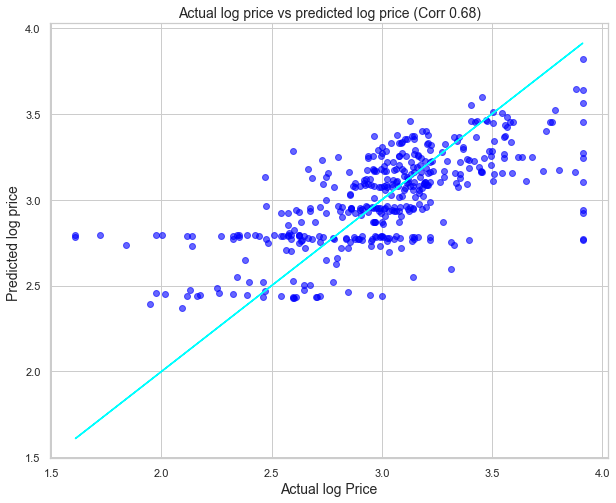

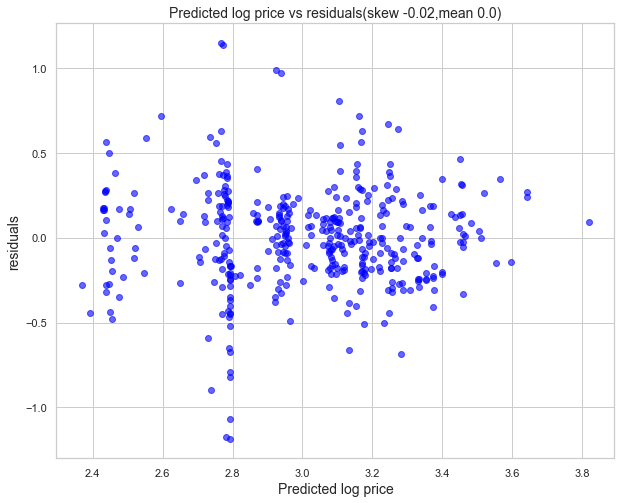

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


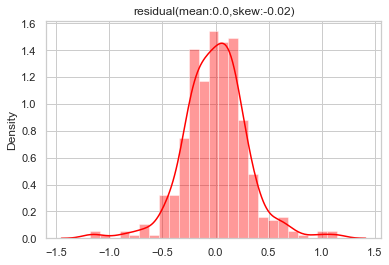

In [81]:
# MOdel omitting key features using log price
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis = 1)
targets = np.log(data.PRICE)

# splitiong into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(features, targets, 
                                                    train_size=0.8, random_state=10 )


# algorithm
X_incl_constant = sm.add_constant(X_train)
mod = sm.OLS(endog = y_train, exog = X_incl_constant)
results = mod.fit()

# plotting actual vs predicted price
plt.figure(figsize=(10,8))
plt.scatter(x=y_train, y=results.fittedvalues, c='blue', alpha=0.6)
plt.plot(y_train, y_train, color = 'cyan')
plt.xlabel('Actual log Price', fontsize=14)
plt.ylabel('Predicted log price ', fontsize=14)
plt.title(f'Actual log price vs predicted log price (Corr {round(y_train.corr(results.fittedvalues),2)})', fontsize=14)
plt.show()

#plotting predicted values vs residuals
resid_mean = round(results.resid.mean(),2)
resid_skew = round(results.resid.skew(), 2)
plt.figure(figsize=(10,8))
plt.scatter(x=results.fittedvalues, y=results.resid, c='blue', alpha=0.6) 
plt.xlabel('Predicted log price', fontsize=14)
plt.ylabel('residuals', fontsize=14)
plt.title(f'Predicted log price vs residuals(skew {resid_skew},mean {resid_mean})', fontsize=14)
plt.show()

#plotting distplot
sns.distplot(results.resid, color="red").set_title(f'residual(mean:{resid_mean},skew:{resid_skew})')
plt.show()


# MSE & Rsquared
omitted_mse = results.mse_resid
omitted_rsquared = results.rsquared

observation: we can see long band forming in above plots which shows,
important features are dropped as correlation dropped. <br>
We can still see the 50,000 house price outliers are still there, <br>
which shows that something is missing from model: <br> 1)features of these all home are in common,
<br> 2)the data was not collected properly, <br> 3)interaction between features that are not captured by our model.

In [82]:
pd.DataFrame({'mse' : [modified_log_mse, normal_price_mse, omitted_mse], 'rsquared':[modified_log_rsquared, normal_price_rsquared, omitted_rsquared]
             , 'RMSE': np.sqrt([modified_log_mse, normal_price_mse, omitted_mse])},
             index = ['modified model', 'normal price model', 'feature omitted model'])

mse  rsquared      RMSE
modified model          0.034873  0.791866  0.186744
normal price model     19.921197  0.750122  4.463317
feature omitted model   0.089571  0.459960  0.299284

observation: so, higher the rsquared value better the model, so modified model is best here <br>
mse closer to 0, the better the fit of model to the data points., so modified model is best here <br>
RMSE is root MSE, it gives range of 1standard deviation from predicted values.

In [83]:
# for 30,000 estimate find the range of 2 s.t.d

print('1 s.d of log price is:', np.sqrt(modified_log_mse))
print('2 s.d of log price is:',2 * np.sqrt(modified_log_mse))

upperbound = np.log(30) + 2* np.sqrt(modified_log_mse)
print('upperbound in log prices for 95% predic 1000tion interval is: ', upperbound)
print('upperbound in normal prices: ', np.e**upperbound * 1000 )

lowerbound = np.log(30) - 2 * np.sqrt(modified_log_mse)
print('lowerbound in log prices for 95% predic 1000tion interval is: ', lowerbound)
print('lowerbound in normal prices: $',np.e**lowerbound * 1000 )


1 s.d of log price is: 0.18674413196549436
2 s.d of log price is: 0.3734882639309887
upperbound in log prices for 95% predic 1000tion interval is:  3.774685645593144
upperbound in normal prices:  43583.8054007552
lowerbound in log prices for 95% predic 1000tion interval is:  3.027709117731167
lowerbound in normal prices: $ 20649.87193579029


In [84]:
import boston_house_price_valuation_tool as bst
bst.get_dollar_estimate(6,20,False)

The estimated property value is 522000.0.
at 95 confidence the valuation range is
USD 359000.0 at lower end to USD 760000.0 at high end.
